In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation

import numpy as np
from tqdm import tqdm

from IPython.display import Image, Video, HTML


<img src="project.png">

Heat equation:
$$
    \frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} + f(x, y, t) \\
    f \equiv 0
$$

let's rename:
$$
    v^m_{jk} \equiv v(x_j, y_k, t_m)
$$

Explicit method in 2D:
$$
\frac{v^{m+1}_{jk} - v^{m}_{jk}}{\tau} = \^L_x v^{m}_{jk} + \^L_y v^{m}_{jk}

$$

Here:
$$
    \^L_xv^{m}_{jk} \equiv \frac{v^{m}_{j+1,k}-2v^{m}_{j,k} + v^{m}_{j-1,k}}{h_x^2} \\
    \^L_yv^{m}_{jk} \equiv \frac{v^{m}_{j,k+1}-2v^{m}_{j,k} + v^{m}_{j,k-1}}{h_y^2}

$$

Let's take $h_x=h_y=h$

We have two spatial variables. So let's do two substeps on each time step.
Renaming:
$$
    \omega^i \equiv v^{k+i/2};\ i = 1,\ 2
$$

For $\omega^i$:
$$
    \frac{\omega^{i+1}-\omega^{i}}{\tau}=\^L_i \frac{\omega^{i+1}+\omega^{i}}{2}
$$

So for $v$, we have such steps:
$$
    \frac{v^{m+1}-v^{m+1/2}}{\tau}=\^L_x \frac{v^{m+1}+v^{m+1/2}}{2} \\
    \\ \
    \\
    \frac{v^{m+3/2}-v^{m+1}}{\tau}=\^L_y \frac{v^{m+3/2}+v^{m+1}}{2}
$$

Let's resign m+1/2 -> m:
$$
    \frac{v^{m+1/2}-v^{m}}{\tau}=\^L_x \frac{v^{m+1/2}+v^{m}}{2} \\
    \\ \
    \\
    \frac{v^{m+1}-v^{m+1/2}}{\tau}=\^L_y \frac{v^{m+1}+v^{m+1/2}}{2}
$$

Or, for $\omega$ equation we have:
$$
    -\frac{\rho}{2}\omega^{i+1}_{j+1,k} + (1+\rho)\omega^{i+1}_{j,k} - \frac{\rho}{2}\omega^{i+1}_{j-1,k} = \
    \frac{\rho}{2}\omega^{i}_{j+1,k} + (1-\rho)\omega^{i}_{j,k} + \frac{\rho}{2}\omega^{i}_{j-1,k}; \\
    \\ \ 
    \\ 
    -\frac{\rho}{2}\omega^{i+2}_{j,k+1} + (1+\rho)\omega^{i+2}_{j,k} - \frac{\rho}{2}\omega^{i+2}_{j,k-1} = \
    \frac{\rho}{2}\omega^{i+1}_{j,k+1} + (1-\rho)\omega^{i+1}_{j,k} + \frac{\rho}{2}\omega^{i+1}_{j,k-1}; \\
    \\ \
    \\
    \rho = \frac{\tau}{h^2}

$$

By i+1 and i+2 I mean 1/2 step over time and full step respectively.

$$
\left( \begin{matrix}
 1 & 0 & 0 & 0 & \dots & 0 & 0 & 0 \\
 -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & 0 & \dots & 0 & 0 & 0 \\
 0 & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \  & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & 0 & \dots & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} \\
 0 & 0 & 0 & 0 & \dots & 0 & 0 & 1
\end{matrix} \right)
* 
\left(\begin{matrix} 
\omega_0 \\ 
\omega_1 \\ 
\omega_2 \\ 
\vdots \\ 
\omega_{n-1} \\ 
\omega_n 
\end{matrix}\right)
=
\left(\begin{matrix}
0 \\ 
\frac{\rho}{2} \omega_0 + (1-\rho)\omega_1 + \frac{\rho}{2}\omega_2\\ 
\frac{\rho}{2} \omega_1 + (1-\rho)\omega_2 + \frac{\rho}{2}\omega_3\\ 
\vdots \\ 
\frac{\rho}{2} \omega_{n-2} + (1-\rho)\omega_{n-1} + \frac{\rho}{2}\omega_n\\ 
0
\end{matrix}\right)
$$

$$
A=
\left(
\begin{matrix}
 b_1 & c_1 & 0 & 0 & \dots & 0 & 0 & a_1 \\
 a_2 & b_2 & c_2 & 0 & \dots & 0 & 0 & 0 \\
 0 & a_3 & b_3 & c_3 & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \ & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & 0 & \dots & a_{n-1} & b_{n-1} & c_{n-1} \\
 c_n & 0 & 0 & 0 & \dots & 0 & a_n & b_n
\end{matrix} \right)
=
\left( \begin{matrix}
 1 & 0 & 0 & 0 & \dots & 0 & 0 & 0 \\
 -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & 0 & \dots & 0 & 0 & 0 \\
 0 & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \  & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & 0 & \dots & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} \\
 0 & 0 & 0 & 0 & \dots & 0 & 0 & 1
\end{matrix} \right)
$$

Row 1 and row n - are border conditions.

### Setting all the constants up

In [2]:
L = 1
T =  5

N = 100     # Steps over x/y
M = 1000    # Steps over t

h = 2 * L/N 
tau = T/M / 2   # Half-step over t

r = tau / h**2

x = np.linspace(-L, L, N + 1)
y = np.linspace(-L, L, N + 1)
X, Y = np.meshgrid(x, y)

### Function to plot initial temperature distribution

In [28]:
def plot_temp(temp):
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, temp, rstride=1, cstride=1, 
                    cmap='viridis', edgecolor='none')

    ax.set_title('Initial temperature distribution')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')
    ax.set_zlim((np.min(temp), np.max(temp)))

### Function to animate results

In [4]:
def animate(aX, aY, aZ, fps, filename):
   plot_args = {'rstride' : 1, 'cstride' : 1,
             'cmap' : 'viridis', 'edgecolor' : 'none'}
   frn = np.shape(aZ)[0]

   zs = np.zeros((np.shape(aZ)[1], np.shape(aZ)[2], frn))
   for i in range(frn):
      zs[:, :, i] = aZ[i]



   fig = plt.figure(figsize=(10,8))
   ax = fig.add_subplot(111, projection='3d')
   
   ax.set_zlim((np.min(aZ), np.max(aZ)))

   ax.set_xlabel('x')
   ax.set_ylabel('y')
   ax.set_zlabel('u')


   def change_plot(frame_number, zarray, plot):
      plot[0].remove()
      plot[0] = ax.plot_surface(aX, aY, zarray[:, :, frame_number], **plot_args)

   plot = [ax.plot_surface(aX, aY, zs[:, :, 0], **plot_args)]

   anim = animation.FuncAnimation(fig, change_plot, frn, fargs=(zs, plot), interval=1000/fps, save_count=frn)
   writervideo = animation.FFMpegWriter(fps=fps) 
   anim.save(filename, writer=writervideo)

### Function to plot temperature maximum versus time  

In [5]:
def plot_tmax(maxes):
    plt.figure()
    plt.plot(np.linspace(0, T, M), maxes)
    plt.yscale('log')
    plt.xlabel('time')
    plt.ylabel('T')
    plt.title('Maximum temperature')
    plt.grid()
    plt.show()

# Zero boundary conditions 

In [6]:
def TMA(w):
    A = np.array([0] + [-r / 2 for i in range(N - 1)] + [0])
    B = np.array([1] + [ 1 + r for i in range(N - 1)] + [1])
    C = np.array([0] + [-r / 2 for i in range(N - 1)] + [0])
    
    D = (r/2)*np.roll(w, 1) +  (1-r)*w + (r/2)*np.roll(w,-1)
    D[0], D[-1] = 0, 0

    for i in range(N):
        xi = A[i+1] / B[i]
        B[i+1] -= xi * C[i]
        D[i+1] -= xi * D[i]
    
    W = np.zeros(N + 1)
    W[-1] = D[-1] / B[-1]
    
    for i in range(N - 1, -1, -1):
        W[i] = (D[i] - C[i] * W[i + 1]) / B[i]
    
    return W

0.0


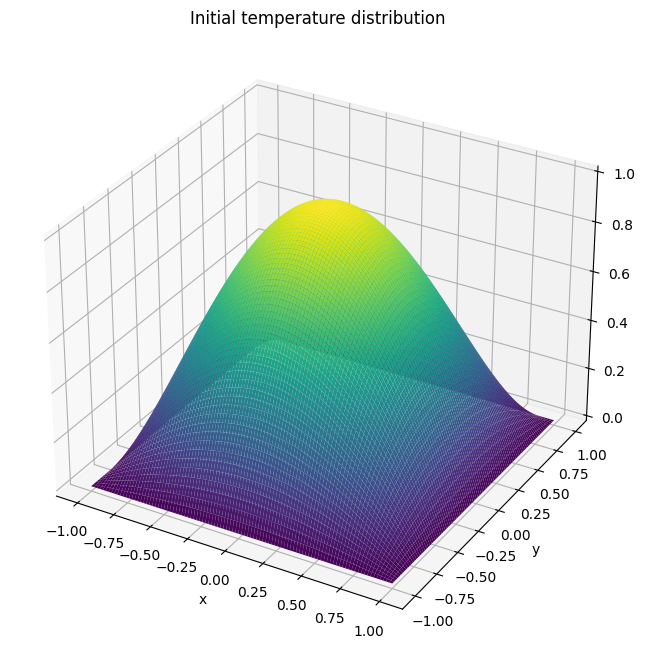

In [7]:
W = [[np.zeros(N + 1), np.zeros(N + 1)] for _ in range(M)] # Temperatures
T_max = np.zeros(M) 

u0 = lambda x, y: (1 - x**2 / L**2) * (1 - y**2 / L**2) 
Z0 = u0(X, Y) # Initial

W[0] = Z0
plot_temp(Z0)

In [8]:
T_max[0] = np.max(W[0])

for i in tqdm(range(M - 1)):
    temp = np.array([TMA(w) for w in W[i]]) # first part of tau step
    W[i+1] = np.array([TMA(w) for w in temp.transpose()]).transpose() # second part of tau step
    
    T_max[i+1] = np.max(W[i+1])

100%|██████████| 999/999 [00:42<00:00, 23.40it/s]


In [9]:
%%capture
animate(X, Y, W[:(len(W)//3)], fps=50, filename=r"./zeroBC.mp4");

In [10]:
Video("zeroBC.mp4", html_attributes="muted autoplay loop")

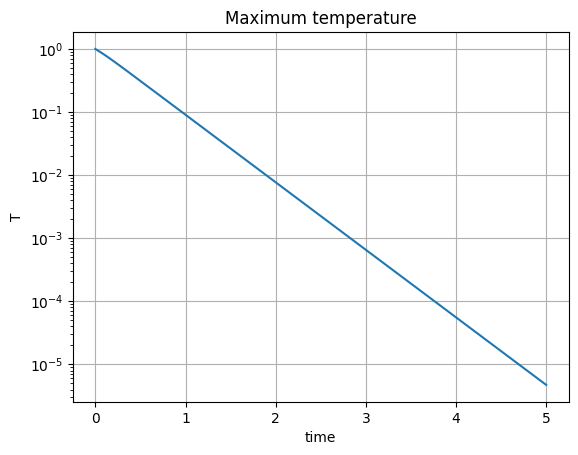

In [11]:
plot_tmax(T_max)

### Dirichlet boundary conditions

Let's apply boundary conditions:
$$
\left( \begin{matrix}
 1 & 0 & 0 & 0 & \dots & 0 & 0 & 0 \\
 -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & 0 & \dots & 0 & 0 & 0 \\
 0 & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \  & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & 0 & \dots & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} \\
 0 & 0 & 0 & 0 & \dots & 0 & 0 & 1
\end{matrix} \right)
* 
\left(\begin{matrix} 
\omega_0 \\ 
\omega_1 \\ 
\omega_2 \\ 
\vdots \\ 
\omega_{n-1} \\ 
\omega_n 
\end{matrix}\right)
=
\left(\begin{matrix}
LB \\ 
\frac{\rho}{2} \omega_0 + (1-\rho)\omega_1 + \frac{\rho}{2}\omega_2\\ 
\frac{\rho}{2} \omega_1 + (1-\rho)\omega_2 + \frac{\rho}{2}\omega_3\\ 
\vdots \\ 
\frac{\rho}{2} \omega_{n-2} + (1-\rho)\omega_{n-1} + \frac{\rho}{2}\omega_n\\ 
RB
\end{matrix}\right)
$$

In [12]:
def TMA_D(w, lb = 0, rb = 0):
    A = np.array([0] + [-r / 2 for i in range(N - 1)] + [0])
    B = np.array([1] + [ 1 + r for i in range(N - 1)] + [1])
    C = np.array([0] + [-r / 2 for i in range(N - 1)] + [0])
    
    D = (r/2)*np.roll(w, 1) +  (1-r)*w + (r/2)*np.roll(w,-1)
    D[0], D[-1] = lb, rb

    for i in range(1, N + 1):
        xi = A[i] / B[i - 1]
        B[i] -= xi * C[i - 1]
        D[i] -= xi * D[i - 1]
    
    W = np.zeros(N + 1)
    W[-1] = D[-1] / B[-1]
    
    for i in range(N - 1, -1, -1):
        W[i] = (D[i] - C[i] * W[i + 1]) / B[i]
    
    return W

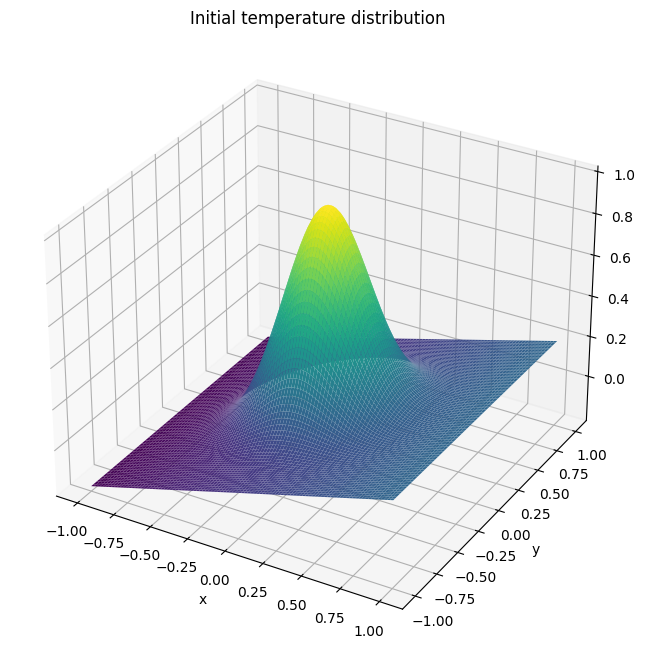

In [74]:
W_D = [[np.zeros(N + 1), np.zeros(N + 1)] for _ in range(M)]
T_D_max = np.zeros(M) 

u_D = lambda x, y: np.exp(-(x**2+y**2)*8) + x/5
Z_D = u_D(X, Y)

W_D[0] = Z_D
plot_temp(Z_D)

In [14]:
T_D_max[0] = np.max(W_D[0])

for i in tqdm(range(M - 1)):
    temp = np.array([TMA_D(w, lb=u_D(X[j][0], Y[j][0]), rb=u_D(X[j][-1], Y[j][-1])) for j, w in enumerate(W_D[i])]) # first part of tau step, der over X

    W_D[i+1] = np.array([TMA_D(w,lb=u_D(X[0][j], Y[0][j]), rb=u_D(X[-1][j], Y[-1][j])) for j, w in enumerate(temp.transpose())]).transpose() # second part of tau step, der over Y
    T_D_max[i+1] = np.max(W_D[i+1])

100%|██████████| 999/999 [00:45<00:00, 22.10it/s]


In [15]:
%%capture
animate(X, Y, W_D[:(len(W_D)//3)], fps=50, filename=r"./Dirichlet.mp4");

In [16]:
Video("Dirichlet.mp4", html_attributes="muted autoplay loop")

### Neumann boundary conditions

We need conditions for $v'$.

$v'$ on the boundaries are:
$$
    v'(0)\approx\frac{-3v_0+4v_1-v_2}{2h}   \\
    \\ \
    \\
    v'(x_N)\approx\frac{3v_N-4v_{N-1}+v_{N-2}}{2h}
$$

So, system and matrix are:

$$
\left( \begin{matrix}
 -\frac{3}{2h} & \frac{2}{h} & -\frac{1}{2h} & 0 & \dots & 0 & 0 & 0 \\
 -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & 0 & \dots & 0 & 0 & 0 \\
 0 & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \  & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & 0 & \dots & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} \\
 0 & 0 & 0 & 0 & \dots & \frac{1}{2h} & -\frac{2}{h} & \frac{3}{2h}
\end{matrix} \right)
* 
\left(\begin{matrix} 
\omega_0 \\ 
\omega_1 \\ 
\omega_2 \\ 
\vdots \\ 
\omega_{n-1} \\ 
\omega_n 
\end{matrix}\right)
=
\left(\begin{matrix}
RB \\ 
\frac{\rho}{2} \omega_0 + (1-\rho)\omega_1 + \frac{\rho}{2}\omega_2\\ 
\frac{\rho}{2} \omega_1 + (1-\rho)\omega_2 + \frac{\rho}{2}\omega_3\\ 
\vdots \\ 
\frac{\rho}{2} \omega_{n-2} + (1-\rho)\omega_{n-1} + \frac{\rho}{2}\omega_n\\ 
LB
\end{matrix}\right)
$$

$$
A=
\left(
\begin{matrix}
 b_1 & c_1 & 0 & 0 & \dots & 0 & 0 & a_1 \\
 a_2 & b_2 & c_2 & 0 & \dots & 0 & 0 & 0 \\
 0 & a_3 & b_3 & c_3 & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \ & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & 0 & \dots & a_{n-1} & b_{n-1} & c_{n-1} \\
 c_n & 0 & 0 & 0 & \dots & 0 & a_n & b_n
\end{matrix} \right)
=
\left( \begin{matrix}
 -\frac{3}{2h} & \frac{2}{h} & -\frac{1}{2h} & 0 & \dots & 0 & 0 & 0 \\
 -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & 0 & \dots & 0 & 0 & 0 \\
 0 & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \  & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & \dots & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & 0\\
 0 & 0 & 0 & 0 & \dots & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} \\
 0 & 0 & 0 & 0 & \dots & \frac{1}{2h} & -\frac{2}{h} & \frac{3}{2h}
\end{matrix} \right) = \\
\\ \
\\
=
\left( \begin{matrix}
 1+\frac{\rho}{3} & \frac{2}{h} & 0 & 0 & \dots & 0 & 0 & 0 \\
 -\frac{\rho}{3} & 1+\rho & -\frac{\rho}{3} & 0 & \dots & 0 & 0 & 0 \\
 0 & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \  & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & \dots & -\frac{\rho}{2} & 1+\rho & -\frac{\rho}{2} & 0\\
 0 & 0 & 0 & 0 & \dots & -\frac{\rho}{3} & 1+\rho & -\frac{\rho}{2} \\
 0 & 0 & 0 & 0 & \dots & 0 & -\frac{\rho}{3} & 1+\frac{\rho}{3}
\end{matrix} \right)
$$

In [97]:
def TMA_N(w, lb = 0, rb = 0):
    A = np.array([0] + [-r / 2 for i in range(N - 1)] + [-r/3])
    B = np.array([1+r/3] + [ 1 + r for i in range(N - 1)] + [1+r/3])
    C = np.array([-r/3] + [-r / 2 for i in range(N - 1)] + [0])
    
    D = (r/2)*np.roll(w, 1) +  (1-r)*w + (r/2)*np.roll(w,-1)
    D[0], D[-1] = lb, rb

    for i in range(1, N + 1):
        xi = A[i] / B[i - 1]
        B[i] -= xi * C[i - 1]
        D[i] -= xi * D[i - 1]
    
    W = np.zeros(N + 1)
    W[-1] = D[-1] / B[-1]
    
    for i in range(N - 1, -1, -1):
        W[i] = (D[i] - C[i] * W[i + 1]) / B[i]

    return W


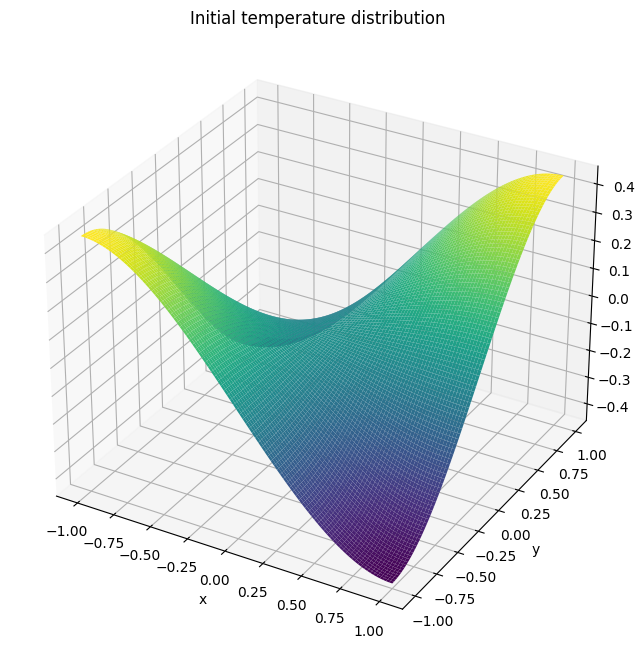

In [98]:
W_N = [[np.zeros(N + 1), np.zeros(N + 1)] for _ in range(M)]
T_N_max = np.zeros(M) 

u_N = lambda x, y: (x - x**3/(3*L**2)) * (y - y**3/(3*L**2))
dudx = lambda x, y: (1 - x**2/L**2) * (y - y**3/(3*L**2))
dudy = lambda x, y: (x - x**3/(3*L**2)) * (1 - y**2/L**2)

Z_N = u_N(X, Y)

W_N[0] = Z_N
plot_temp(Z_N)

In [111]:
T_N_max[0] = np.max(W_N[0])

for i in tqdm(range(M - 1)):
    temp = np.array([TMA_N(w, lb=dudx(X[j][0], Y[j][0]), rb=dudx(X[j][-1], Y[j][-1])) for j, w in enumerate(W_N[i])]) # first part of tau step, der over X

    W_N[i+1] = np.array([TMA_N(w,lb=dudy(X[0][j], Y[0][j]), rb=dudy(X[-1][j], Y[-1][j])) for j, w in enumerate(temp.transpose())]).transpose() # second part of tau step, der over Y
    T_N_max[i+1] = np.max(W_N[i+1])

100%|██████████| 999/999 [00:28<00:00, 34.60it/s]


In [112]:
%%capture
animate(X, Y, W_N[:200], fps=10, filename=r"./Neumann.mp4");

In [113]:
Video("Neumann.mp4", html_attributes="muted autoplay loop")